In [29]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

In [2]:
import imp
imp.reload(little_mallet_wrapper)

<module 'little_mallet_wrapper' from '/Users/mah343/Documents/projects/little-mallet-wrapper/little_mallet_wrapper.py'>

<br><br>

# MALLET Path

Change the path below to the location of your local MALLET installation.

In [3]:
MALLET_PATH = '/Users/mah343/Documents/packages/mallet-2.0.8/bin/mallet'

<br><br>

# Load poetry dataset

Data is available here: https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset

In [4]:
poetry_path = '/Volumes/Maria\'s Black Passport/data/kaggle-poem-dataset/kaggle_poem_dataset.csv'

In [5]:
# 'https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset/download'

In [8]:
poetry_df = pd.read_csv(poetry_path)

poetry_df.sample(10)

,Unnamed: 0,Author,Title,Poetry Foundation ID,Content
13848,13848,Walter Savage Landor,To Robert Browning,44570,"There is delight in singing, tho’ none hear\nB..."
12082,12082,Aracelis Girmay,sister was the wolf,146241,sister was the wolf\n&amp; could cross easily ...
2723,2723,Anonymous,The Cuckoo Song,51454,"Sing, cuccu, nu. Sing, cuccu.\nSing, cuccu. Si..."
5973,5973,Emily Dickinson,I dwell in Possibility – (466),52197,I dwell in Possibility –\nA fairer House than ...
3759,3759,Amrita Pritam,Empty Space\n \n \n \n Launch Audio in a Ne...,54736,There were two kingdoms only:\nthe first of th...
2246,2246,Baron Brooke Fulke Greville,Chorus Sacerdotum,47683,from Mustapha\nO wearisome condition of humani...
8231,8231,Gary Snyder,Meeting the Mountains,47755,He crawls to the edge of the foaming creek\nHe...
5596,5596,Constance Urdang,Her House,30916,If I am in the house\nbeams posts planks sidin...
11558,11558,Eliza Griswold,Sample,56411,"When you said no,\nI went for your dresser,\no..."
3168,3168,Christine Gosnay,"Difference, Difference",147876,Gravel path stirred by the rain\nfallen hard t...


In [9]:
print(len(poetry_df.index))

15652


In [10]:
print(len(poetry_df.loc[poetry_df['Author'] == 'Robert Browning'].index))

39


In [11]:
print(len(poetry_df.loc[poetry_df['Author'] == 'William Butler Yeats'].index))

47


In [12]:
print(len(poetry_df.loc[poetry_df['Author'] == 'John Keats'].index))

32


In [13]:
print(len(poetry_df.loc[poetry_df['Author'] == 'Emily Dickinson'].index))

57


In [14]:
print(len(poetry_df.loc[poetry_df['Author'] == 'Christina Rossetti'].index))

30


In [15]:
training_documents = [lmw.process_string(_text) for _text in poetry_df['Content'].tolist()]

len(training_documents)

15652

In [16]:
training_documents[100]

'year twelve daughters turn gone measured pace tho varying mien twelve froward sedater adorn festival reckless attire snow left mountain top fresh flowers withered meadow fig prune hung wrinkling last apple glow amid freckled leaves weary oxen blinkt trodden corn twisted vine whose bunches stood empty crate creak ere long beneath carried home season twelve months gentle hamadryad true love thy mansion thy dim mansion wood blasted laid desolate none dared violate precincts none dared pluck moss beneath alone remain thine old thallinos sat mute solitary sadness strange tale rhaicos died whole echion related force could ever make look back upon oaks father said echion thou must weigh carefully steady hand enough although longer comes store wax burn day night upon hollow stone milk honey lie may gods may dead pleas thallinos bore thither morn lighted left first visited upon solemn day hamadryad oak rhodope acon one age one hope one trust graceful nymph whose fate sorrowed slender pale firs

In [17]:
authors = poetry_df['Author'].tolist()

len(authors)

15652

<br><br>

# Train topic model

Depending on the size of your dataset, training can take a while. For very large datasets, I recommending training outside of a notebook.

While training, you can observe progress by checking the terminal window from which you started Jupyter.

In [18]:
num_topics = 20

In [19]:
output_directory_path = 'output'

training_data_path           = output_directory_path + '/training.txt'
formatted_training_data_path = output_directory_path + '/mallet.training'
model_path                   = output_directory_path + '/mallet.model.' + str(num_topics)
topic_keys_path              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
topic_distributions_path     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)

In [22]:
lmw.train_topic_model(MALLET_PATH,
                      training_data_path,
                      formatted_training_data_path,
                      model_path,
                      topic_keys_path,
                      topic_distributions_path,
                      training_documents,
                      num_topics)

Importing data...
Training topic model...
Removing temporary files...


<br><br>

# Load the topics

In [23]:
topics = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.20')

for i, t in enumerate(topics):
    print(i, '\t', t)

0 	 ['must', 'man', 'may', 'one', 'would', 'life', 'good', 'much', 'yet', 'never', 'love', 'give', 'well', 'still', 'mind', 'men', 'best', 'things', 'take', 'know']
1 	 ['night', 'like', 'light', 'heart', 'day', 'upon', 'eyes', 'life', 'love', 'song', 'sleep', 'one', 'earth', 'sun', 'dark', 'hear', 'death', 'long', 'soul', 'voice']
2 	 ['like', 'city', 'street', 'streets', 'air', 'across', 'past', 'back', 'men', 'fire', 'car', 'dance', 'broken', 'music', 'dead', 'faces', 'smoke', 'play', 'song', 'behind']
3 	 ['god', 'dead', 'let', 'death', 'man', 'world', 'men', 'blood', 'children', 'mother', 'earth', 'name', 'one', 'love', 'die', 'say', 'come', 'lord', 'fire', 'life']
4 	 ['num', 'poem', 'poetry', 'poems', 'write', 'read', 'book', 'america', 'poet', 'writing', 'new', 'english', 'words', 'like', 'name', 'wrote', 'people', 'war', 'american', 'word']
5 	 ['said', 'could', 'would', 'one', 'came', 'saw', 'went', 'back', 'knew', 'took', 'thought', 'made', 'first', 'left', 'looked', 'never'

In [24]:
topic_distributions = lmw.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.20')

len(topic_distributions), len(topic_distributions[0])

(15642, 20)

In [25]:
topic_distributions[0]

[0.04807692307692308,
 0.16346153846153846,
 0.009615384615384616,
 0.009615384615384616,
 0.27884615384615385,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.04807692307692308,
 0.009615384615384616,
 0.04807692307692308,
 0.08653846153846154,
 0.08653846153846154,
 0.125,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616,
 0.009615384615384616]

<br><br>

# Plot topics by category

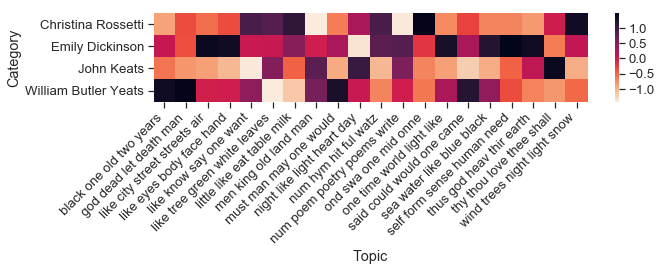

In [26]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

lmw.plot_categories_by_topics_heatmap(authors,
                                      topic_distributions,
                                      topics, 
                                      'output/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(10,4))

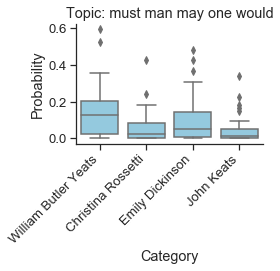

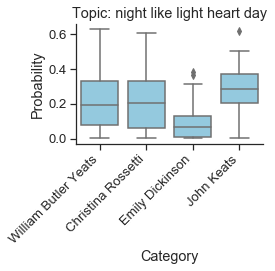

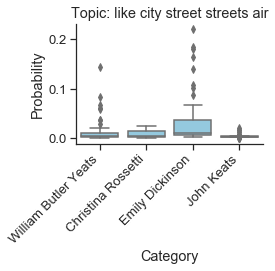

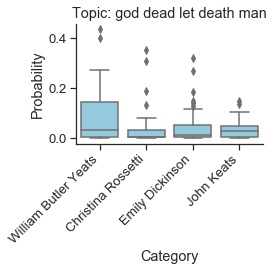

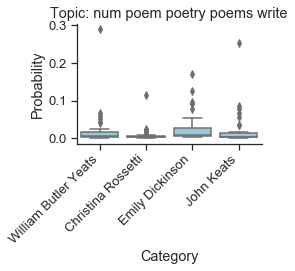

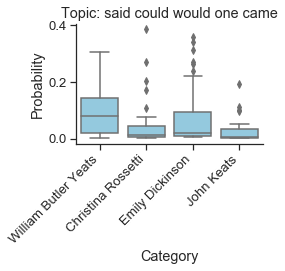

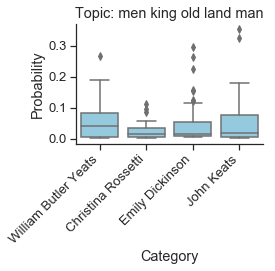

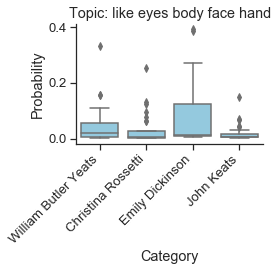

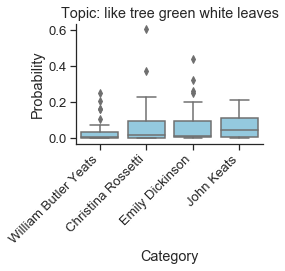

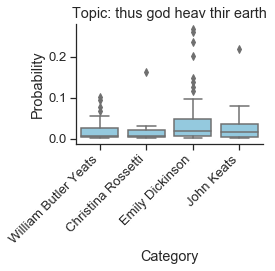

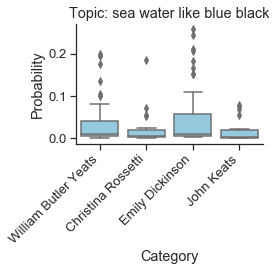

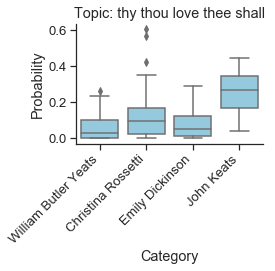

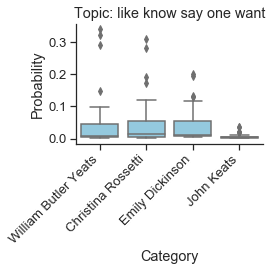

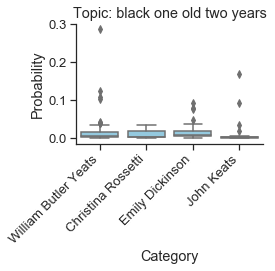

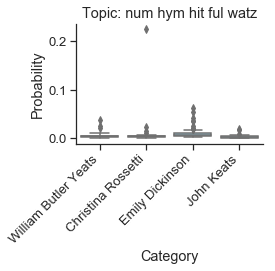

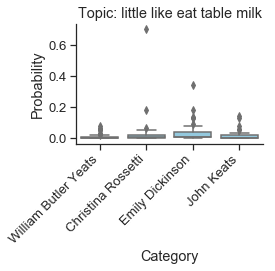

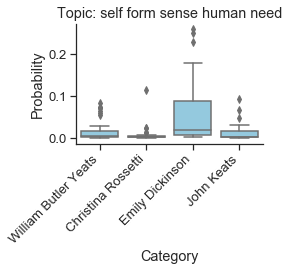

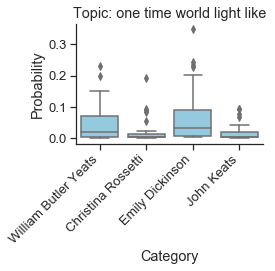

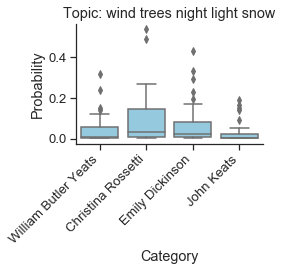

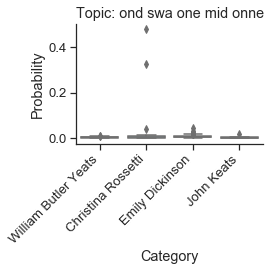

In [27]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

for _topic_index in range(0, len(topics)):
    
    lmw.plot_categories_by_topic_boxplots(authors,
                                          topic_distributions,
                                          topics, 
                                          _topic_index,
                                          output_path='output/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

<br><br>

# Plot topics over time

In [100]:
divided_documents, document_ids, times = lmw.divide_training_data(training_documents,
                                                                  num_chunks=10)

len(divided_documents), len(document_ids), len(times)

(156520, 156520, 156520)

In [ ]:
# TODO: Change to re-using inferencer already trained.

In [104]:
num_topics = 20
output_directory_path = 'output-divided'

lmw.train_topic_model(MALLET_PATH,
                      output_directory_path,
                      training_documents,
                      num_topics)

Importing data...
Training topic model...
Removing temporary files...


In [105]:
topics = little_mallet_wrapper.load_topic_keys(output_directory_path + '/mallet.topic_keys.20')

for i, t in enumerate(topics):
    print(i, '\t', t)

0 	 ['love', 'know', 'one', 'say', 'man', 'like', 'mother', 'let', 'come', 'see', 'woman', 'world', 'never', 'body', 'father', 'dead', 'want', 'tell', 'nothing', 'god']
1 	 ['num', 'hym', 'hit', 'ful', 'watz', 'alle', 'hem', 'bot', 'wyth', 'hir', 'god', 'may', 'wel', 'schal', 'enne', 'ther', 'hire', 'fro', 'vpon', 'man']
2 	 ['thy', 'thou', 'love', 'shall', 'thee', 'yet', 'may', 'heart', 'life', 'let', 'see', 'fair', 'would', 'must', 'art', 'soul', 'mine', 'hath', 'never', 'eyes']
3 	 ['water', 'river', 'back', 'like', 'sky', 'across', 'air', 'sea', 'one', 'blue', 'along', 'sand', 'light', 'fish', 'way', 'see', 'edge', 'wind', 'rain', 'toward']
4 	 ['upon', 'day', 'heart', 'yet', 'round', 'long', 'like', 'sweet', 'still', 'night', 'little', 'far', 'many', 'song', 'air', 'whose', 'bright', 'deep', 'sing', 'voice']
5 	 ['like', 'eyes', 'hand', 'head', 'face', 'hands', 'mouth', 'little', 'eat', 'one', 'hair', 'dog', 'tongue', 'bed', 'milk', 'body', 'eye', 'lips', 'man', 'sweet']
6 	 ['lik

In [106]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.20')

len(topic_distributions), len(topic_distributions[0])

(15642, 20)

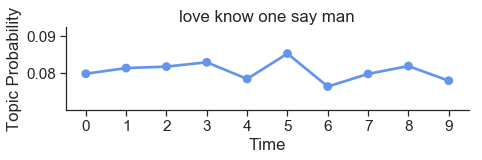

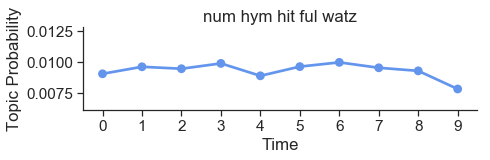

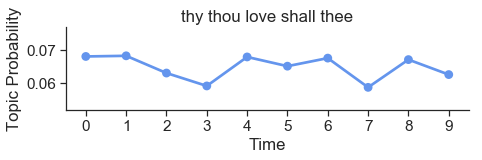

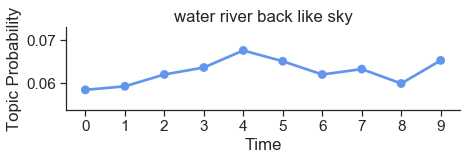

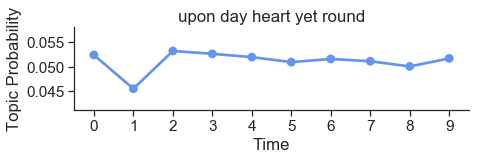

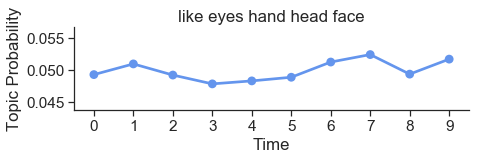

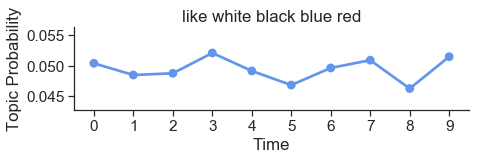

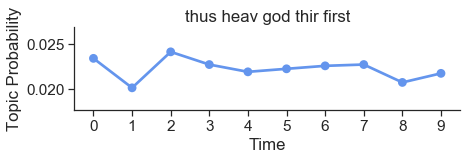

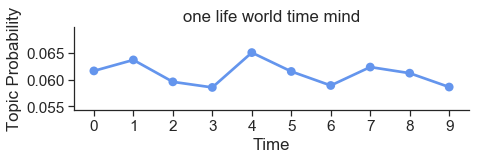

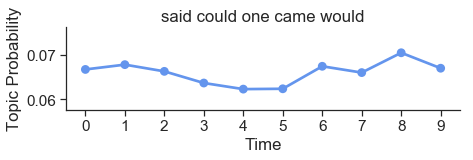

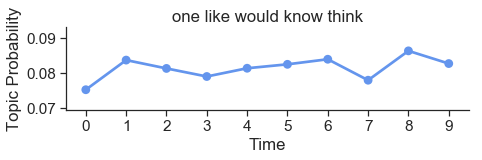

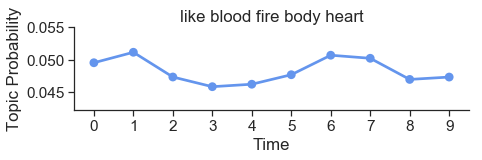

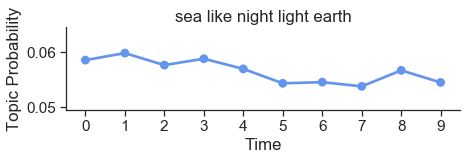

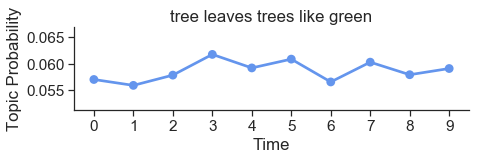

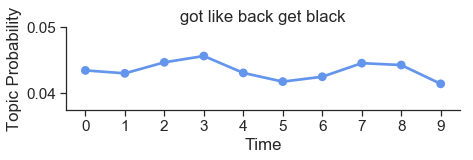

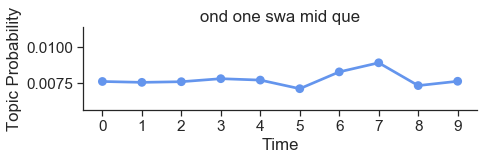

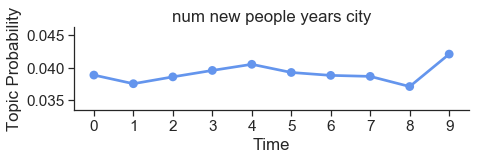

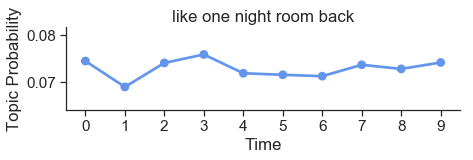

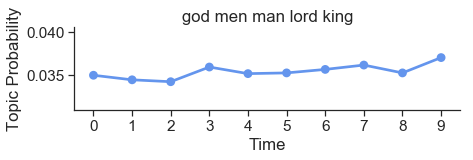

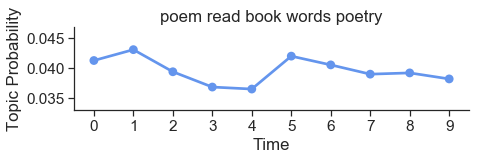

In [111]:
for _topic_index in range(0, len(topics)):
    little_mallet_wrapper.plot_topics_over_time(topic_distributions, topics, times, _topic_index)